In [15]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load the Dataset
df = pd.read_csv("ev_sales_india.csv")  # update path if needed
df.head()


,State,Year,EV_Type,Sales
0,Maharashtra,2018,Two-Wheeler,12000
1,Maharashtra,2019,Two-Wheeler,15000
2,Maharashtra,2020,Two-Wheeler,18000
3,Maharashtra,2021,Two-Wheeler,22000
4,Karnataka,2018,Two-Wheeler,8000


In [17]:
# Step 3: Explore the Dataset
print(df.info())
print(df.describe())
print(df['State'].value_counts())
print(df['EV_Type'].value_counts())

# Optional: Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    20 non-null     object
 1   Year     20 non-null     int64 
 2   EV_Type  20 non-null     object
 3   Sales    20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes
None
              Year         Sales
count    20.000000     20.000000
mean   2019.500000   9750.000000
std       1.147079   5120.906581
min    2018.000000   3000.000000
25%    2018.750000   6000.000000
50%    2019.500000   8500.000000
75%    2020.250000  12250.000000
max    2021.000000  22000.000000
State
Maharashtra    4
Karnataka      4
Tamil Nadu     4
Delhi          4
Gujarat        4
Name: count, dtype: int64
EV_Type
Two-Wheeler     12
Four-Wheeler     8
Name: count, dtype: int64


State      0
Year       0
EV_Type    0
Sales      0
dtype: int64

In [19]:
# Step 4: Encode Categorical Variables
le_state = LabelEncoder()
le_evtype = LabelEncoder()

df['State_encoded'] = le_state.fit_transform(df['State'])
df['EV_Type_encoded'] = le_evtype.fit_transform(df['EV_Type'])

df_encoded = df[['Year', 'State_encoded', 'EV_Type_encoded', 'Sales']]
df_encoded.head()


,Year,State_encoded,EV_Type_encoded,Sales
0,2018,3,1,12000
1,2019,3,1,15000
2,2020,3,1,18000
3,2021,3,1,22000
4,2018,2,1,8000


In [21]:
# Step 5: Train-Test Split
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 2310.4774970922153
MSE: 6016627.035364224
RMSE: 2452.8813740913406
R² Score: 0.6001410900692521


C:\Users\POOJA\AppData\Local\Temp\ipykernel_14272\102349673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')


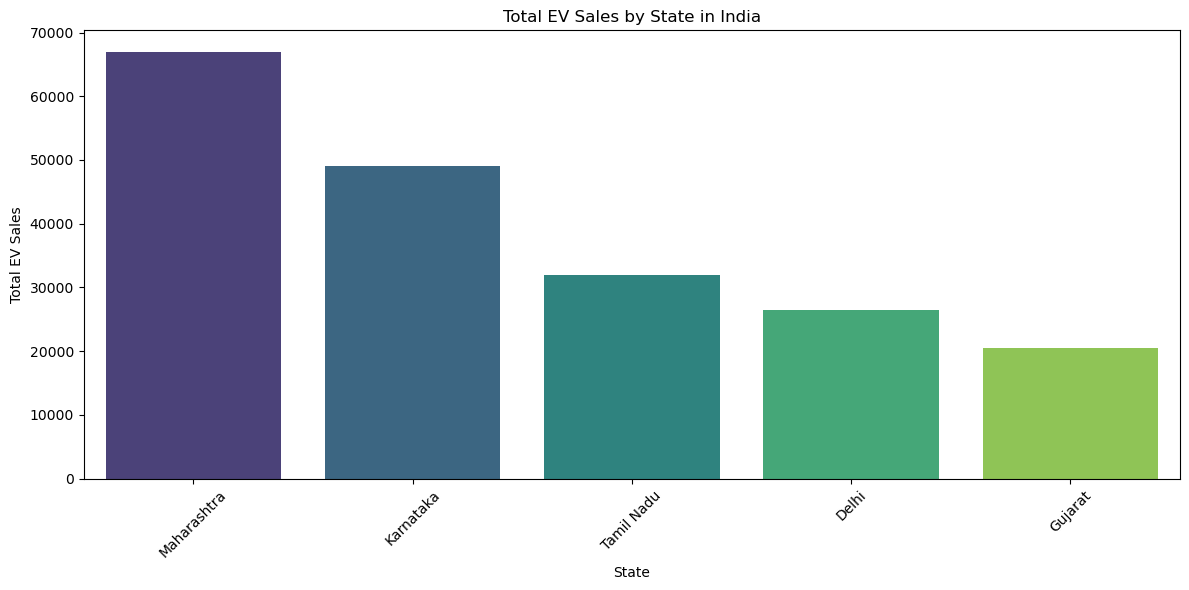

In [33]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total EV Sales by State in India')
plt.xlabel('State')
plt.ylabel('Total EV Sales')
plt.tight_layout()
plt.show()



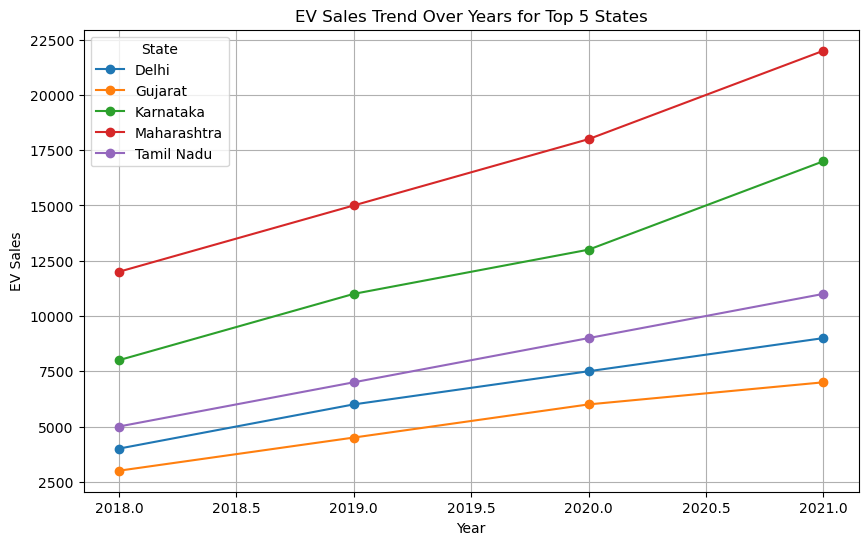

In [35]:
top_states = state_sales.head(5).index
df_top = df[df['State'].isin(top_states)]

yearly_sales = df_top.groupby(['Year', 'State'])['Sales'].sum().unstack()

yearly_sales.plot(figsize=(10,6), marker='o')
plt.title('EV Sales Trend Over Years for Top 5 States')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.grid(True)
plt.show()


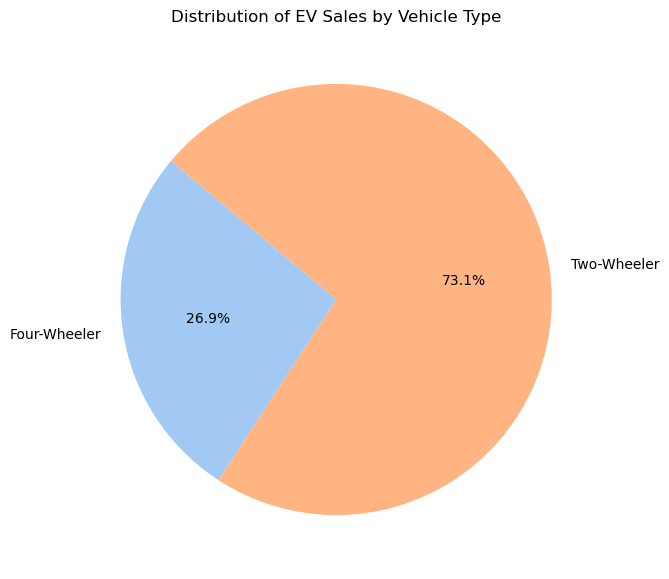

In [37]:
type_sales = df.groupby('EV_Type')['Sales'].sum()

plt.figure(figsize=(7,7))
type_sales.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of EV Sales by Vehicle Type')
plt.ylabel('')
plt.show()
